Supongamos que queremos clasificar un grupo de consumidores de televisión de pago en función de sus preferencias por series o películas. Para ello contamos con los siguientes datos de entrada:   

1.  Tenemos un total de 40 clientes   

2. Clasificador I: 30 de esos clientes son hombres mientras que 10 de ellos son mujeres  

    * En el grupo de los hombres 20 consumen series y 10 películas   
    
    * En el grupo de las mujeres 5 consumen series y 5 películas
    
       
3. Clasificador II: 15 de esos clientes tienen más de 40 años y 25 tienen menos de 40 años  

    * En el grupo de mayores de 40 años 13 consumen series y 2 consumen películas   
    
    * En el grupo de menores de 40 años 12 consumen series y 13 consumen películas  


Construye un árbol de decisión para ambos clasificadores y determina cual de los dos clasificadores nos aporta una mayor ganancia de información.  

In [15]:
# utilizaremos sckit-learn para generar el arbol de decision
!pip install -U scikit-learn pandas numpy matplotlib pydotplus

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 KB 1.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=d4593eddd1b631fe1b250fa6d4862440acd5c29d9cd71703d4c6a1222b1a5ce2
  Stored in directory: /home/carlos/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus


In [13]:
# Verificar Versión de Python
import sys
assert sys.version_info >= (3, 7)

# Scikit-Learn ≥0.20 es requerido
import sklearn
assert sklearn.__version__ >= "0.20"



# Eliminar warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importaciones comunes
import pandas as pd
import numpy as np
import os
import random

# configurar semilla aleatoria
np.random.seed(42)

# Configuraciones de Seaborn
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("colorblind")


# Configuraciones de Matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Preparación del Conjunto de Datos

Para resolver este problema, primero necesitamos preparar el conjunto de datos. Dado que tenemos un total de 40 clientes, podemos representar el conjunto de datos como una lista de 40 elementos, donde cada elemento es una lista que contiene la información de cada cliente. Cada elemento de la lista contendrá la siguiente información:

1. Género del cliente (Hombre o Mujer)
2. Edad del cliente (Mayor de 40 años o Menor de 40 años)
3. Preferencia del cliente (Series o Películas)

Por ejemplo, el primer cliente es un hombre mayor de 40 años que prefiere las series, por lo que su información se puede representar como `['Hombre', 'Mayor de 40 años', 'Series']`. A continuación, creamos una lista de 40 elementos que representan a los 40 clientes.

In [7]:
data = {
    'gender': ['Hombre']*30 + ['Mujer']*10, # 30 Hombres y 10 Mujeres
    'age': ['>40']*15 + ['<40']*25, # 15 Mayores de 40 y 25 Menores de 40
    'prefer': ['Series']*20 + ['Películas']*10 + ['Series']*5 + ['Películas']*5 # 20 Prefieren Series y 20 Prefieren Películas
}
# Crear DataFrame
df = pd.DataFrame(data)

In [8]:
# Convertimos las variables categóricas a numéricas  
df['gender'] = df['gender'].map({'Hombre': 0, 'Mujer': 1})
df['age'] = df['age'].map({'>40': 0, '<40': 1})
df['prefer'] = df['prefer'].map({'Series': 0, 'Películas': 1})

In [11]:
# aleatorizamos el dataset
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,gender,age,prefer
0,0,0,0
1,0,0,0
2,1,1,1
3,1,1,1
4,1,1,0


## Definición de Variables de Entrada y Objetivo

A continuación, definimos las variables de entrada y objetivo. Las variables de entrada son el género y la edad del cliente, mientras que el objetivo es la preferencia del cliente (Series o Películas). A continuación, definimos las variables de entrada y objetivo.

In [24]:
# Definimos las variables de entrada y la variable objetivo
X_1 = df[['gender']] # Clasificador 1
X_2 = df[['age']]   # Clasificador 2
y = df['prefer']        # Variable objetivo

## Construcción del Árbol de Decisión

A continuación, construimos un árbol de decisión para ambos clasificadores y determinamos cuál de los dos clasificadores nos aporta una mayor ganancia de información. Para ello, calculamos la ganancia de información para cada clasificador y seleccionamos el clasificador con la mayor ganancia de información.

In [25]:
from sklearn.tree import DecisionTreeClassifier  # Importamos la clase para el Clasificador de Árbol de Decisión  

dt_clf_1 = DecisionTreeClassifier(criterion='entropy')
dt_clf_2 = DecisionTreeClassifier(criterion='entropy')
dt_clf_1.fit(X_1, y)
dt_clf_2.fit(X_2, y)

DecisionTreeClassifier(criterion='entropy')

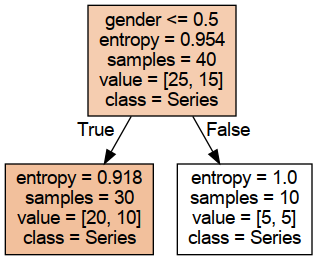

In [26]:
# visualizar el árbol de decisión para el clasificador 1
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(
    dt_clf_1, 
    out_file=None, 
    feature_names=['gender'],  
    class_names=['Series', 'Películas'], 
    filled=True
)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

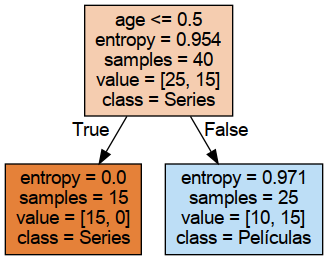

In [27]:
# visualizar el árbol de decisión para el clasificador 2
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(
    dt_clf_2, 
    out_file=None, 
    feature_names=['age'],  
    class_names=['Series', 'Películas'], 
    filled=True
)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

La ganancia de información se calcula como la diferencia entre la entropía inicial del conjunto de datos y la entropía después de la división por un clasificador. La entropía inicial es la impureza del conjunto de datos antes de cualquier división, y la entropía después de la división es la suma ponderada de las entropías de cada subconjunto creado por la división.

In [34]:
# Definimos la función para calcular la entropía  
def entropy(target_col):  
    elements, counts = np.unique(target_col, return_counts=True)  
    entropy = -np.sum([(counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(elements))])  
    return entropy  
  
# Entropía inicial del conjunto de datos  
total_entropy = entropy(y)  
print('Entropía del conjunto de datos:', total_entropy)

Entropía del conjunto de datos: 0.954434002924965


In [35]:
# Entropía de las divisiones para Clasificador 1 (Género)  
entropy_gender = 0  
for value in df['gender'].unique():  
    subset = y[df['gender'] == value]  
    entropy_gender += (len(subset) / len(y)) * entropy(subset)

# Ganancia de información para Clasificador 1  
info_gain_gender = total_entropy - entropy_gender
print("Entropia de la división por género:", entropy_gender)
print("Ganancia de información por género (Clasificador 1):", info_gain_gender)

Entropia de la división por género: 0.9387218755408672
Ganancia de información por género (Clasificador 1): 0.015712127384097885


In [36]:
# Entropía de las divisiones para Clasificador 2 (Edad)  
entropy_age = 0  
for value in df['age'].unique():  
    subset = y[df['age'] == value]  
    entropy_age += (len(subset) / len(y)) * entropy(subset)  
  
# Ganancia de información para Clasificador 2  
info_gain_age = total_entropy - entropy_age  
print("Entropia de la división por edad:", entropy_age)
print("Ganancia de información por edad (Clasificador 2):", info_gain_age)

Entropia de la división por edad: 0.6068441215341679
Ganancia de información por edad (Clasificador 2): 0.34758988139079716


In [37]:
# Decidimos cuál clasificador es mejor basado en la ganancia de información  
if info_gain_gender > info_gain_age:  
    print("El Clasificador basado en Género proporciona una mayor ganancia de información.")  
else:  
    print("El Clasificador basado en Edad proporciona una mayor ganancia de información.")  

El Clasificador basado en Edad proporciona una mayor ganancia de información.
